In [24]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
comp = pd.read_csv('Complications_-_Hospital.csv')

In [3]:
death = pd.read_csv('Readmissions_and_Deaths.csv')

In [7]:
comp['Hospital Name'].unique().

array(['SOUTHEAST ALABAMA MEDICAL CENTER', 'MARSHALL MEDICAL CENTER SOUTH',
       'ELIZA COFFEE MEMORIAL HOSPITAL', ...,
       'CONTINUECARE HOSPITAL AT MEDICAL CENTER ODESSA',
       'CUMBERLAND SURGICAL HOSPITAL', 'WEIMAR MEDICAL CENTER'], dtype=object)

In [8]:
list = []
for x in comp['Hospital Name']:
    for y in death['Hospital Name']:
        if x == y:
            list.append(x)

KeyboardInterrupt: 

In [11]:
z = set(comp['Hospital Name']) & set(death['Hospital Name']) #intersection 

In [13]:
len(z)

4608

In [15]:
u = set(comp['Hospital Name']) | set(death['Hospital Name']) #union 
len(u)

4608

In [16]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52877 entries, 0 to 52876
Data columns (total 19 columns):
Provider ID             52877 non-null int64
Hospital Name           52877 non-null object
Address                 52877 non-null object
City                    52877 non-null object
State                   52877 non-null object
ZIP Code                52877 non-null int64
County Name             52712 non-null object
Phone Number            52877 non-null int64
Measure Name            52877 non-null object
Measure ID              52877 non-null object
Compared to National    52877 non-null object
Denominator             52877 non-null object
Score                   52877 non-null object
Lower Estimate          52877 non-null object
Higher Estimate         52877 non-null object
Footnote                21804 non-null object
Measure Start Date      52877 non-null object
Measure End Date        52877 non-null object
Location                0 non-null float64
dtypes: float64(1), int

In [17]:
death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67298 entries, 0 to 67297
Data columns (total 19 columns):
Provider ID             67298 non-null int64
Hospital Name           67298 non-null object
Address                 67298 non-null object
City                    67298 non-null object
State                   67298 non-null object
ZIP Code                67298 non-null int64
County Name             67088 non-null object
Phone Number            67298 non-null int64
Measure Name            67298 non-null object
Measure ID              67298 non-null object
Compared to National    67298 non-null object
Denominator             67298 non-null object
Score                   67298 non-null object
Lower Estimate          67298 non-null object
Higher Estimate         67298 non-null object
Footnote                25618 non-null object
Measure Start Date      67298 non-null object
Measure End Date        67298 non-null object
Location                0 non-null float64
dtypes: float64(1), int

In [19]:
qual = pd.read_csv('Quality_Measures_-_Long_Stay.csv')
qual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234765 entries, 0 to 234764
Data columns (total 23 columns):
Federal Provider Number                     234765 non-null object
Provider Name                               234765 non-null object
Provider State                              234765 non-null object
Measure Code                                234765 non-null int64
Measure Description                         234765 non-null object
Resident type                               234765 non-null object
Q1 Measure Score                            209075 non-null object
Footnote for Q1 Measure Score               25690 non-null object
Q2 Measure Score                            209692 non-null object
Footnote for Q2 Measure Score               25073 non-null object
Q3 Measure Score                            209839 non-null object
Footnote for Q3 Measure Score               24926 non-null object
Q4 Measure Score                            209885 non-null object
Footnote for Q4 Measur

In [22]:
staffing = pd.read_csv('Staffing.csv')
staffing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15651 entries, 0 to 15650
Data columns (total 25 columns):
Federal Provider Number                                            15651 non-null object
Provider Name                                                      15651 non-null object
Provider State                                                     15651 non-null object
Staffing Rating                                                    15202 non-null float64
Staffing Rating Footnote                                           449 non-null object
RN Staffing Rating                                                 15202 non-null float64
RN Staffing Rating Footnote                                        449 non-null object
Reported Staffing Footnote                                         400 non-null object
Physical Therapist Staffing Footnote                               403 non-null object
Reported CNA Staffing Hours per Resident per Day                   15251 non-null float64
Report

In [21]:
ins = pd.read_csv('Inspection_Cycle_1_Deficiencies.csv')

In [27]:
h = set(qual['Provider Name']) & set(staffing['Provider Name']) & set(ins['Provider Name'])
len(h)

14117

In [15]:
readm_only = death[death['Measure ID'].str.contains('READM')] #excluding mortality
readm_only['Provider ID'].value_counts().count()

4807

In [19]:
readm_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38456 entries, 6 to 67297
Data columns (total 19 columns):
Provider ID             38456 non-null int64
Hospital Name           38456 non-null object
Address                 38456 non-null object
City                    38456 non-null object
State                   38456 non-null object
ZIP Code                38456 non-null int64
County Name             38336 non-null object
Phone Number            38456 non-null int64
Measure Name            38456 non-null object
Measure ID              38456 non-null object
Compared to National    38456 non-null object
Denominator             38456 non-null object
Score                   38456 non-null object
Lower Estimate          38456 non-null object
Higher Estimate         38456 non-null object
Footnote                14162 non-null object
Measure Start Date      38456 non-null object
Measure End Date        38456 non-null object
Location                0 non-null float64
dtypes: float64(1), int

In [16]:
mort_only = death[death['Measure ID'].str.contains('MORT')] #excluding readm
mort_only['Provider ID'].value_counts().count()

4807

In [20]:
mort_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28842 entries, 0 to 67289
Data columns (total 19 columns):
Provider ID             28842 non-null int64
Hospital Name           28842 non-null object
Address                 28842 non-null object
City                    28842 non-null object
State                   28842 non-null object
ZIP Code                28842 non-null int64
County Name             28752 non-null object
Phone Number            28842 non-null int64
Measure Name            28842 non-null object
Measure ID              28842 non-null object
Compared to National    28842 non-null object
Denominator             28842 non-null object
Score                   28842 non-null object
Lower Estimate          28842 non-null object
Higher Estimate         28842 non-null object
Footnote                11456 non-null object
Measure Start Date      28842 non-null object
Measure End Date        28842 non-null object
Location                0 non-null float64
dtypes: float64(1), int

In [37]:
h = readm_only.groupby(['Hospital Name', 'Measure ID', 'Score']).size()

In [73]:
h_in = h.reset_index()

In [25]:
abbot = readm_only[readm_only['Hospital Name'] == 'ABBOTT NORTHWESTERN HOSPITAL']

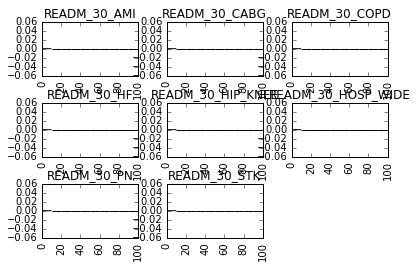

In [46]:
readm_only['Score'].hist(by=readm_only['Measure ID'], bins = 10, range=[0,100])
plt.show()

In [53]:
abbot['Measure ID'].unique()

array(['READM_30_AMI', 'READM_30_CABG', 'READM_30_COPD', 'READM_30_HF',
       'READM_30_HIP_KNEE', 'READM_30_HOSP_WIDE', 'READM_30_PN',
       'READM_30_STK'], dtype=object)

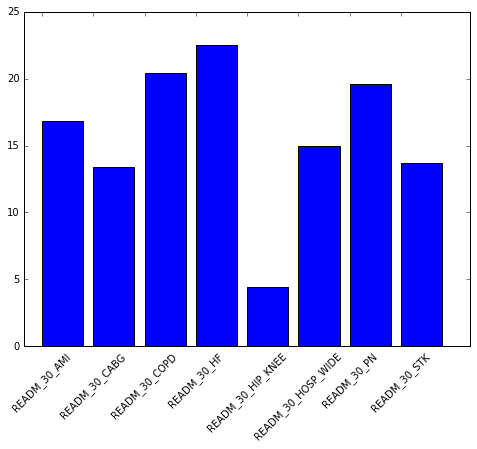

In [72]:

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
wid = .35
ind = ind = np.arange(len(abbot.Score))
plt.bar(ind, abbot.Score)

xTickMarks = [i for i in abbot['Measure ID']]
ax.set_xticks(ind)
xtickNames = ax.set_xticklabels(xTickMarks, fontsize=8)
ax.set_xlim(-wid,len(ind)+wid)
plt.setp(xtickNames, rotation=45, fontsize=10)
plt.show()

ValueError: could not convert string to float: Not Available

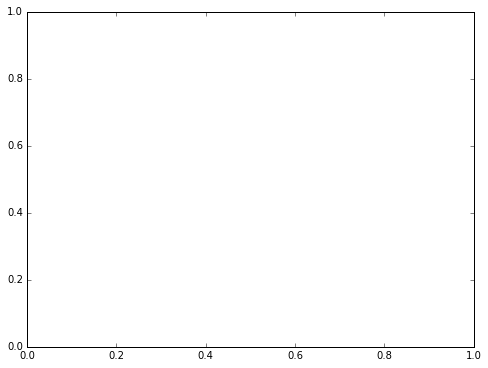

In [75]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
wid = .35
ind = np.arange(len(h_in.Score))
plt.bar(ind, h_in.Score)

xTickMarks = [i for i in h_in['Measure ID']]
ax.set_xticks(ind)
xtickNames = ax.set_xticklabels(xTickMarks, fontsize=8)
ax.set_xlim(-wid,len(ind)+wid)
plt.setp(xtickNames, rotation=45, fontsize=10)
plt.show()

In [38]:
h.reset_index()

,Hospital Name,Measure ID,Score,0
0,ABBEVILLE AREA MEDICAL CENTER,READM_30_AMI,Not Available,1
1,ABBEVILLE AREA MEDICAL CENTER,READM_30_CABG,Not Available,1
2,ABBEVILLE AREA MEDICAL CENTER,READM_30_COPD,20.3,1
3,ABBEVILLE AREA MEDICAL CENTER,READM_30_HF,21.1,1
4,ABBEVILLE AREA MEDICAL CENTER,READM_30_HIP_KNEE,4.4,1
5,ABBEVILLE AREA MEDICAL CENTER,READM_30_HOSP_WIDE,15.7,1
6,ABBEVILLE AREA MEDICAL CENTER,READM_30_PN,17.3,1
7,ABBEVILLE AREA MEDICAL CENTER,READM_30_STK,Not Available,1
8,ABBEVILLE GENERAL HOSPITAL,READM_30_AMI,Not Available,1
9,ABBEVILLE GENERAL HOSPITAL,READM_30_CABG,Not Available,1
